In [187]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import SpectralClustering, KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import plotly.express as px
%matplotlib inline
from sklearn.manifold import TSNE
from sklearn.cluster import SpectralClustering, KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from tqdm import tqdm_notebook

r_seed = np.random.seed(0)

In [91]:
df = pd.read_excel(r'Full_data.xlsx', index_col=0,  header= 4 )

In [92]:
df.head(3)

,"Численность населения, чел","Средняя зарплата 2019/2017, %","Средняя зарплата 2020/2017, %","Средняя зарплата 2020/2019, %","Отклонение от увеличения средней зарплаты округу, %",Темп роста денежного дохода населения в 2020,"Объем жилищного строительства, тыс м2","Ввод жилья МКД, тыс м2","Ввод жилья, построенного населением, тыс м2","Объем жилищного строительства, м2/чел",...,"Кол-во высокопр-ных мест труда 2019, тыс","Кол-во высокопр-ных мест труда 2020, тыс","Рост высокопр-ных мест труда 2020/2019, %","Отклонение от среднего по округу роста высокопр-ных мест труда, %","Уровень бедности 2018, %","Уровень бедности 2019, %","Уровень бедности 2020, %","Уровень бедности 2020/2018, %","Уровень бедности 2020/2019, %","Отклонение изменения уровня бедности, 2020/2019, %"
Российская Федеpация,146171015.0,111.6465,116.6,102.5,NaN,NaN,82.1845,42.3827,39.8018,0.562249,...,16245.002,16938.284,104.267663,NaN,12.6,12.3,12.1,96.031746,98.373984,NaN
Центральный федеральный округ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Белгородская область,1541259.0,110.0040,116.1,104.5,2.705556,98.4,1.1486,0.2136,0.9350,0.745235,...,197.870,217.078,109.707384,4.395232,7.5,7.8,7.2,96.000000,92.307692,-5.039706


In [93]:
mask = [*map(lambda x: x[-4:] not in ['круг','ация'] , df.index)]

In [94]:
df = df[mask]

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83 entries, Белгородская область to Еврейская автономная область
Data columns (total 37 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   Численность населения, чел                                          83 non-null     float64
 1   Средняя зарплата 2019/2017, %                                       83 non-null     float64
 2   Средняя зарплата 2020/2017, %                                       83 non-null     float64
 3   Средняя зарплата 2020/2019, %                                       83 non-null     float64
 4   Отклонение от увеличения средней зарплаты округу, %                 83 non-null     float64
 5   Темп роста денежного дохода населения в 2020                        83 non-null     float64
 6   Объем жилищного строительства, тыс м2                               83 non-n

In [96]:
df.describe()

,"Численность населения, чел","Средняя зарплата 2019/2017, %","Средняя зарплата 2020/2017, %","Средняя зарплата 2020/2019, %","Отклонение от увеличения средней зарплаты округу, %",Темп роста денежного дохода населения в 2020,"Объем жилищного строительства, тыс м2","Ввод жилья МКД, тыс м2","Ввод жилья, построенного населением, тыс м2","Объем жилищного строительства, м2/чел",...,"Кол-во высокопр-ных мест труда 2019, тыс","Кол-во высокопр-ных мест труда 2020, тыс","Рост высокопр-ных мест труда 2020/2019, %","Отклонение от среднего по округу роста высокопр-ных мест труда, %","Уровень бедности 2018, %","Уровень бедности 2019, %","Уровень бедности 2020, %","Уровень бедности 2020/2018, %","Уровень бедности 2020/2019, %","Отклонение изменения уровня бедности, 2020/2019, %"
count,8.300000e+01,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,...,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000
mean,1.798893e+06,111.220566,115.137349,102.413253,-0.136348,97.842169,1.020669,0.529271,0.491398,0.515169,...,202.302133,210.708157,104.335833,0.017304,14.474699,14.465060,14.175904,97.687947,97.735771,0.105704
std,1.821795e+06,3.277014,4.453629,1.938366,1.774791,2.087776,1.319132,0.834248,0.601787,0.258140,...,282.553115,296.445540,6.260109,5.765536,5.026196,5.041231,5.053147,3.694619,2.294506,2.149652
min,1.390340e+05,103.688000,104.400000,97.700000,-5.163636,91.900000,0.009000,0.000000,0.004600,0.048577,...,5.415000,5.364000,86.329505,-11.382667,6.600000,6.500000,5.900000,89.261745,90.769231,-7.713265
25%,7.804055e+05,108.896100,112.850000,101.050000,-1.132937,96.600000,0.290900,0.118550,0.157350,0.348034,...,61.440500,66.039000,100.366586,-3.540549,11.400000,11.650000,11.200000,95.129073,96.171460,-1.068668
50%,1.207875e+06,110.656600,114.400000,102.400000,-0.163636,97.900000,0.650400,0.251500,0.330000,0.470988,...,132.189000,130.683000,104.661223,-0.455192,13.800000,13.800000,13.600000,98.039216,97.777778,0.097242
75%,2.340314e+06,113.064400,117.900000,103.800000,1.014286,99.300000,1.161400,0.508200,0.608950,0.604369,...,213.794500,228.374000,107.521053,3.075273,16.700000,16.250000,16.050000,100.000000,100.000000,1.517505
max,1.265505e+07,119.880000,127.800000,107.500000,5.600000,104.700000,9.040300,4.554400,4.485800,1.408562,...,2087.439000,2224.802000,125.342219,19.132092,34.400000,34.100000,34.100000,110.204082,101.574803,4.552336


In [126]:
for idx, col in enumerate(df.columns):
    print(f'{idx}-{col}')

0-Численность населения, чел
1-Средняя зарплата 2019/2017, %
2-Средняя зарплата 2020/2017, %
3-Средняя зарплата 2020/2019, %
4-Отклонение от увеличения средней зарплаты округу, %
5-Темп роста денежного дохода населения в 2020
6-Объем жилищного строительства, тыс м2
7-Ввод жилья  МКД, тыс м2
8-Ввод жилья, построенного населением, тыс м2
9-Объем жилищного строительства,  м2/чел
10-Отклонение от среднего по округу объема жилищного строительства, %
11-ОПЖ, 2018 г., лет
12-ОПЖ, 2019 г., лет
13-ОПЖ, 2020 г., лет
14-Изменение ОПЖ 2020/2019
15-Отклонение от среднего по округу изменения ОПЖ, лет
16-Прирост населения, 2018, на тыс
17-Прирост населения, 2019, на тыс
18-Прирост населения, 2020, на тыс
19-Изменение прироста населения, 2020/2019, %
20-Отклонение от среднего по округу изменения ОПЖ, лет.1
21-Индекс пр-сти труда 2018/2017 , %
22-Индекс пр-сти труда 2019/2018, %
23-Индекс пр-сти труда 2020 / 2019, %
24-Индекс пр-сти труда 2020 / 2017, %
25-Увеличение темпа прироста пр-сти труда  (2020/

In [133]:
rel_col = [2, 3, 4, 5, 9, 10, 14, 15,17, 18, 19, 22, 23, 25, 26, 29, 30, 33, 34, 35, 36]

In [134]:
df_short = df.iloc[:, rel_col]

In [135]:
df_short.head()

,"Средняя зарплата 2020/2017, %","Средняя зарплата 2020/2019, %","Отклонение от увеличения средней зарплаты округу, %",Темп роста денежного дохода населения в 2020,"Объем жилищного строительства, м2/чел","Отклонение от среднего по округу объема жилищного строительства, %",Изменение ОПЖ 2020/2019,"Отклонение от среднего по округу изменения ОПЖ, лет","Прирост населения, 2019, на тыс","Прирост населения, 2020, на тыс",...,"Индекс пр-сти труда 2019/2018, %","Индекс пр-сти труда 2020 / 2019, %","Увеличение темпа прироста пр-сти труда (2020/2019), %","Отклонение от среднего по округу изменения темпа пр-та пр-сти, %","Рост высокопр-ных мест труда 2020/2019, %","Отклонение от среднего по округу роста высокопр-ных мест труда, %","Уровень бедности 2020, %","Уровень бедности 2020/2018, %","Уровень бедности 2020/2019, %","Отклонение изменения уровня бедности, 2020/2019, %"
Белгородская область,116.1,104.5,2.705556,98.4,0.745235,0.129463,-1.81,0.088333,-4.8,-7.6,...,107.702922,103.5,1.4,-1.144444,109.707384,4.395232,7.2,96.000000,92.307692,-5.039706
Брянская область,113.7,102.2,0.405556,95.8,0.360790,-0.254982,-1.71,0.188333,-6.4,-9.0,...,110.300000,108.1,2.5,-0.044444,99.196815,-6.115336,13.8,101.470588,100.000000,2.652602
Владимирская область,116.5,102.4,0.605556,98.1,0.541093,-0.074679,-1.87,0.028333,-7.5,-10.8,...,108.300000,120.7,17.0,14.455556,100.129482,-5.182670,12.5,95.419847,99.206349,1.858951
Воронежская область,114.4,101.8,0.005556,94.6,0.748523,0.132751,-1.73,0.168333,-5.7,-8.3,...,105.100000,102.5,3.2,0.655556,110.053276,4.741125,8.5,95.505618,95.505618,-1.841780
Ивановская область,108.9,100.6,-1.194444,96.6,0.337578,-0.278194,-1.14,0.758333,-7.9,-10.1,...,107.000000,109.2,7.5,4.955556,103.827544,-1.484607,13.7,93.197279,96.478873,-0.868525


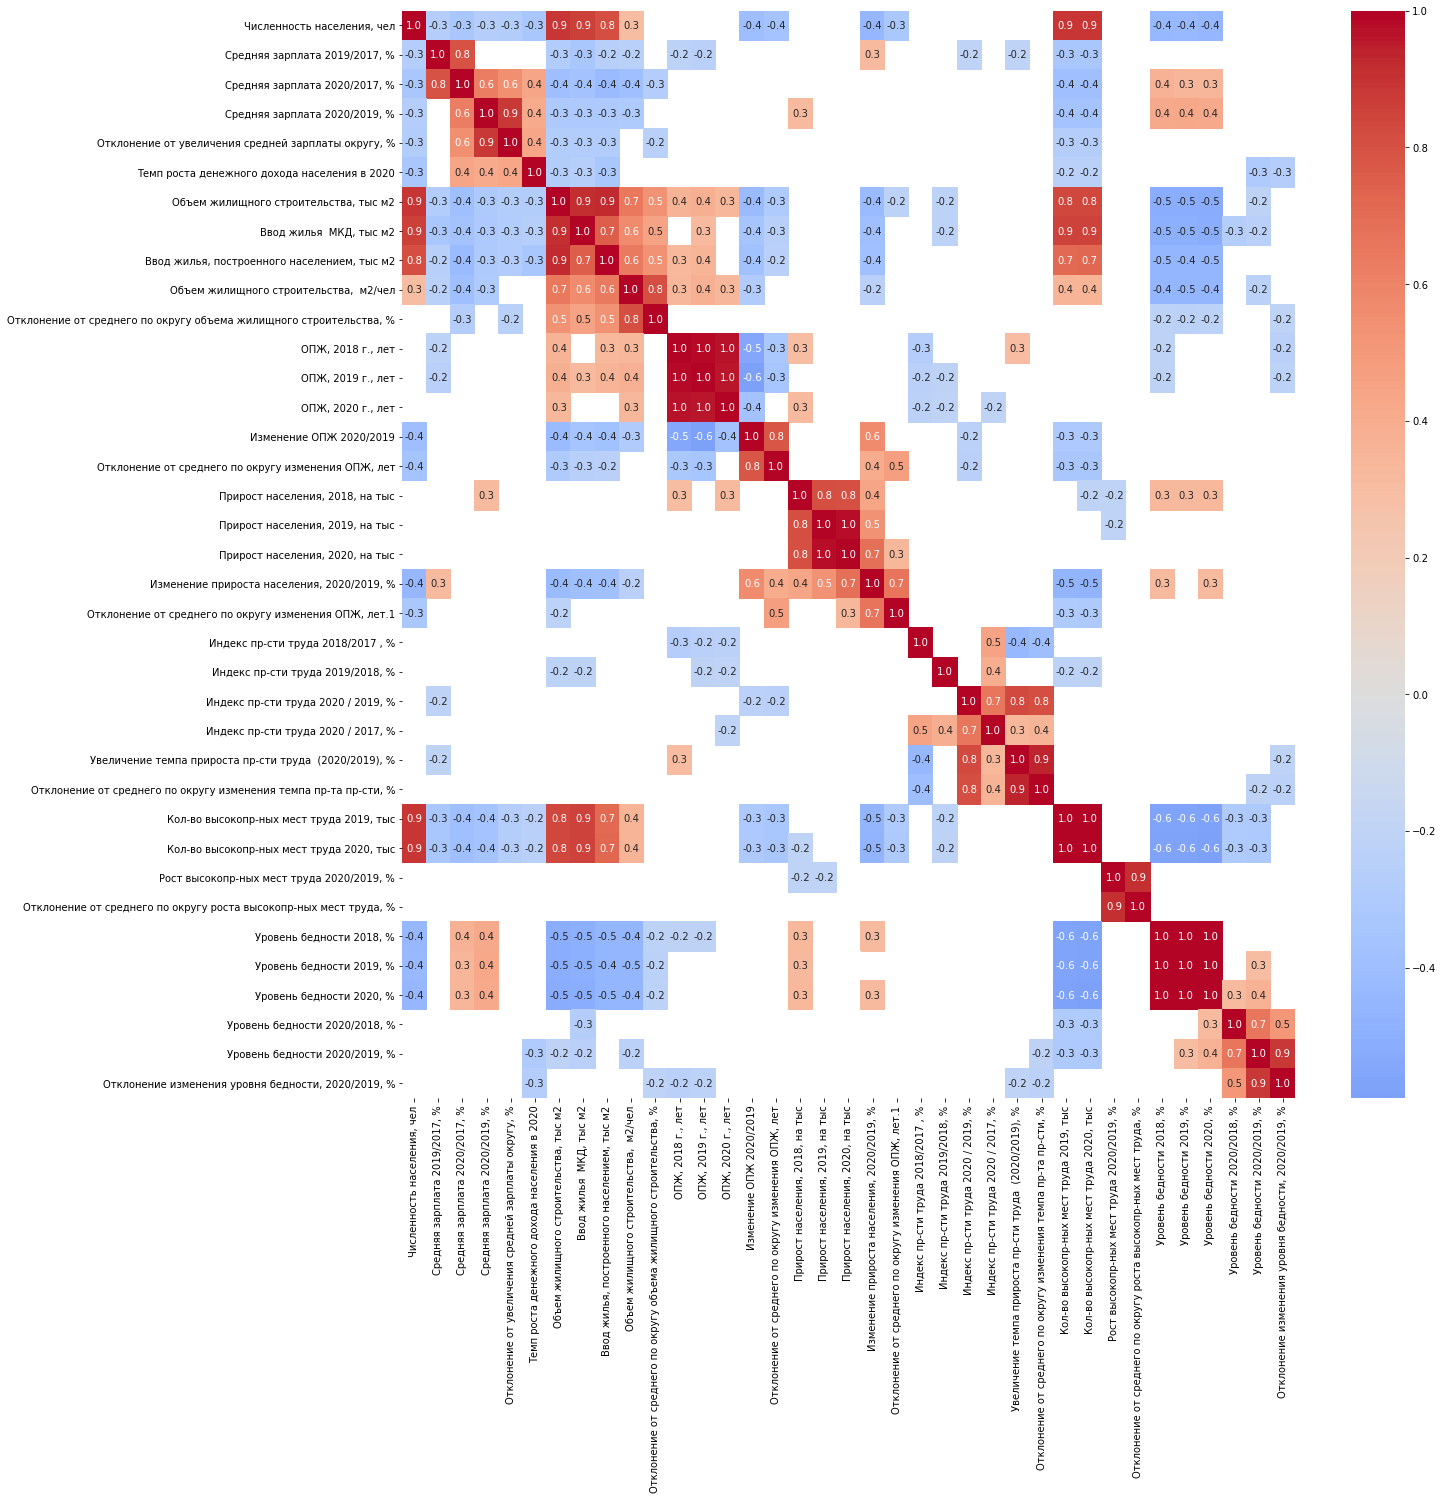

In [136]:

matrix = (df.corr(method='spearman')<0.3) & (df.corr(method='spearman')>-0.2)

plt.figure(figsize=(20, 20))

sns.heatmap(df.corr(method='spearman'), annot=True,
            fmt='.1f', center=0, cmap='coolwarm', mask=matrix)
plt.show()

Исходя из матрицы корреляции признаков видно, что положительно скоррелированы признаки, связанные с объемом строительства и количеством жителей, кол-вом жителей и относительным количеством выскопр-ных мест труда, средней зарплаты и уровнем бедности, объемом строительства и кол-вом выскопр-ных мест труда,  приростом населения и уровня бедности.

Отрицательно скоррелированы признаки, связанные с количеством жителей и уровнем бедности, кол-вом выскопр-ных мест труда и уровнем бедности, кол-вом выскопр-ных мест труда и уровнем бедности

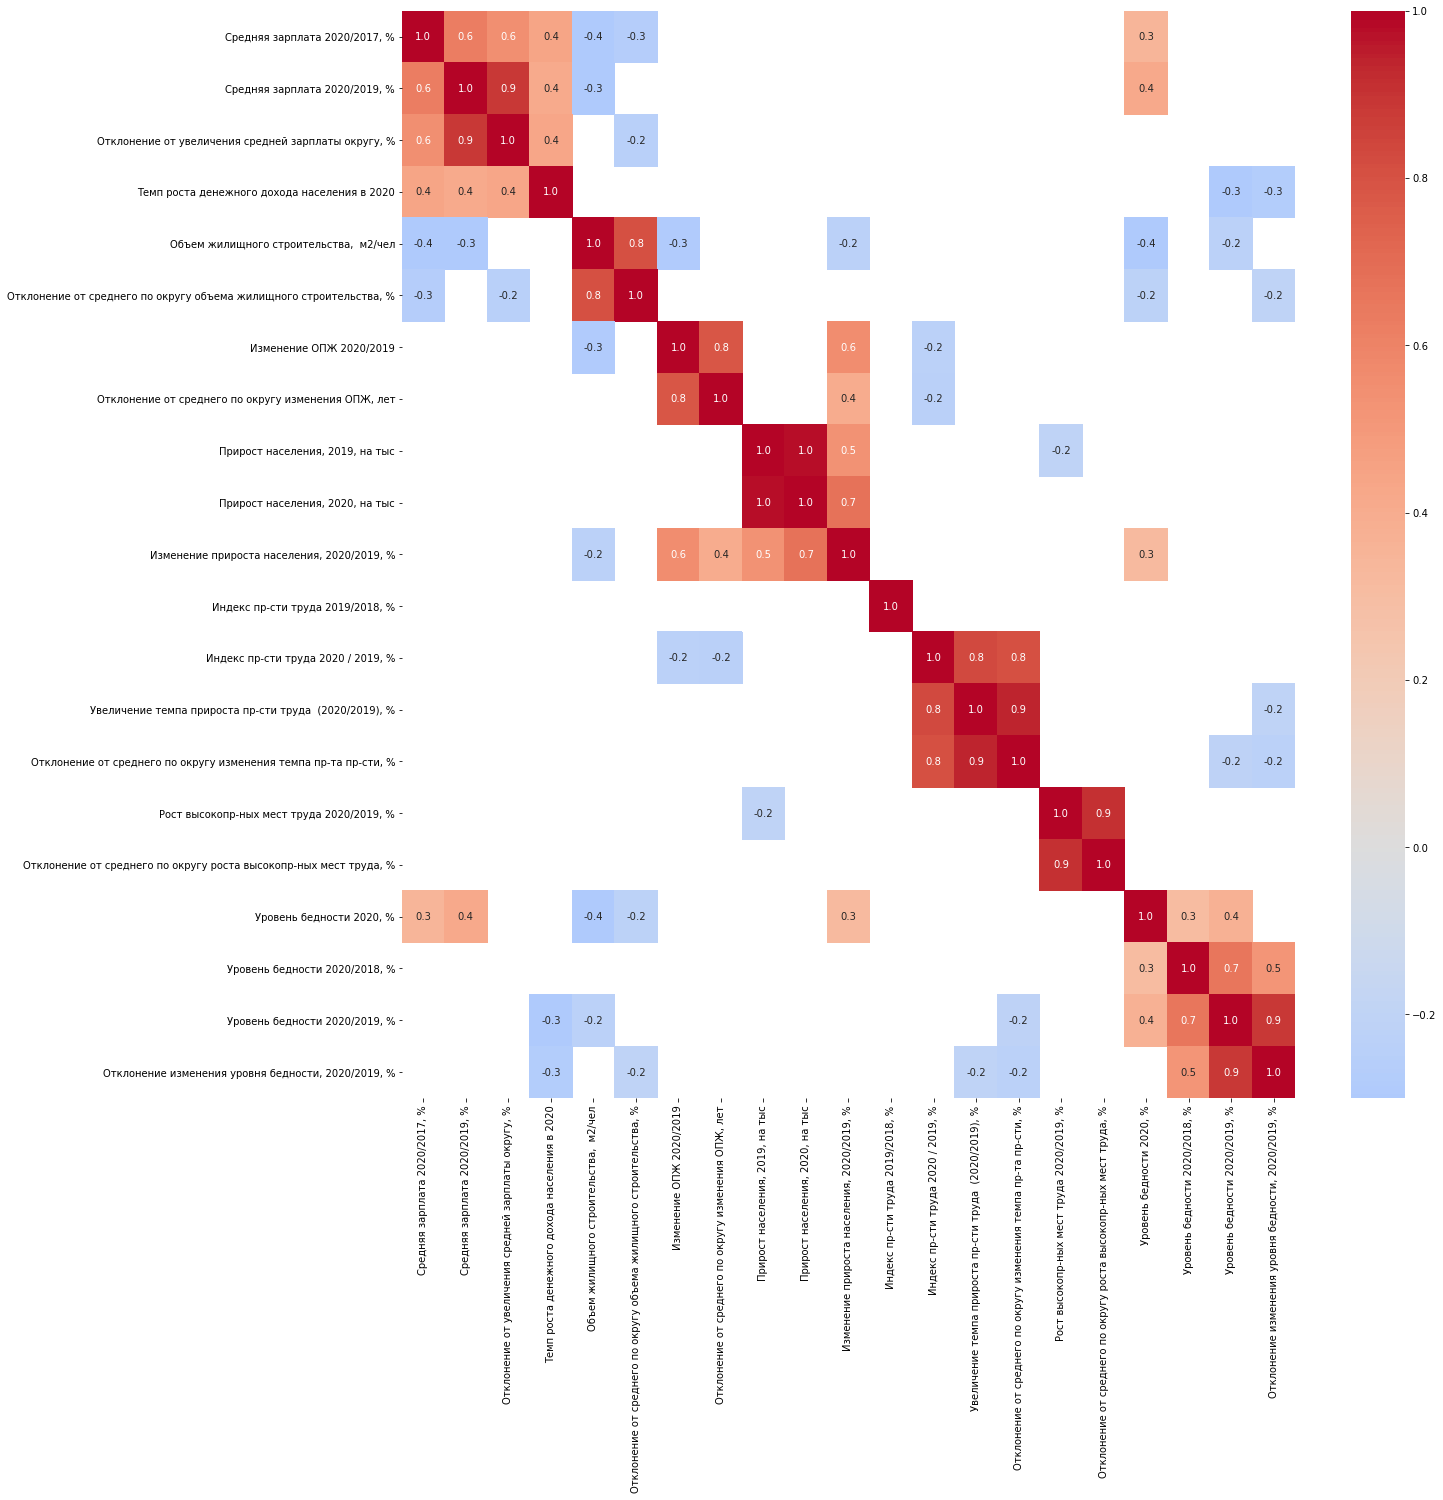

In [138]:
matrix = (df_short.corr(method='spearman')<0.3) & (df_short.corr(method='spearman')>-0.2)

plt.figure(figsize=(20, 20))

sns.heatmap(df_short.corr(method='spearman'), annot=True,
            fmt='.1f', vmin=-0.3, center=0, cmap='coolwarm', mask=matrix)
plt.show()

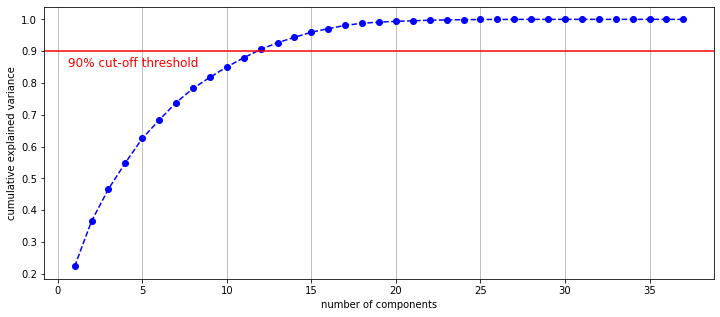

In [178]:
X_scaled = StandardScaler().fit_transform(df)

pca = PCA().fit(X_scaled)

plt.figure(figsize=(12, 5))
x = np.arange(1, len(pca.explained_variance_ratio_)+1)
plt.plot(x, np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--', color='b')
plt.axhline(y=0.9, color='r', linestyle='-')
plt.text(0.6, 0.85, '90% cut-off threshold', color = 'red', fontsize=12)
plt.grid(axis='x')

plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [179]:
pca = PCA(n_components=0.9).fit(X_scaled)

components = pca.fit_transform(X_scaled)
total_var = pca.explained_variance_ratio_.sum() * 100
n_components = len(pca.explained_variance_ratio_)

labels = {str(i): f"PC {i+1}" for i in range(n_components)}
labels['color'] = 'Median Price'
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    components,
    dimensions=range(n_components),
    labels=labels,
    title=f'Total Explained Variance: {total_var:.2f}%',
)
fig.update_traces(marker_size=1, diagonal_visible=False)

fig.update_layout(
    font=dict(size=10, color='black'),
    autosize=False,
    width=1000,
    height=800,
)
fig.show()

In [180]:

pca = PCA(n_components=0.9, random_state=r_seed)
X_pca = pca.fit_transform(X_scaled)

fig = px.scatter_3d(
    X_pca, x=0, y=1, z=2,
    labels={'color': 'species'}
)
fig.update_traces(marker_size=2)
fig.show()

In [181]:
%time
tsne = TSNE(n_components=3, random_state=r_seed)
X_embedding_tsne = tsne.fit_transform(df_short)

fig = px.scatter_3d(
    X_embedding_tsne, x=0, y=1, z=2,
    labels={'color': 'species'}
)
fig.update_traces(marker_size=2)
fig.show()

Wall time: 0 ns


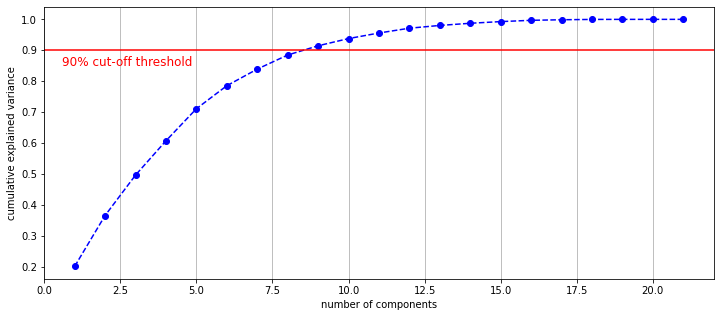

In [182]:
def plot_clustering(
    data: pd.DataFrame,
    data_scale: np.array,
    embedding: np.array,
    model: sklearn.base.ClusterMixin,
    kwargs: dict,
    min_size: int = 2,
    max_size: int = 11,
    type_train: str = None,
) -> dict:
    """
    Общий метод подбора кол-ва кластеров с выодом графиков
    :param data: данные
    :param data_scale: скалированные данные
    :param embedding: эмбединги
    :param model: модель кластеризации
    :param kwargs: параметры алгоритма
    :param min_size: min кол-во кластеров
    :param max_size: max кол-во кластеров
    :param type_train: по каким данным кластеризуем
    :return: словарь с метками кластеров
    """

    calinski_harabasz = []
    silhouette_list = []
    dict_clusters = {}

    if model().__class__.__name__ == "KMeans":
        sse = []
    else:
        labels_std = []
        labels_min = []
        labels_max = []

    for clust in tqdm_notebook(range(min_size, max_size + 1)):
        fig, axes = plt.subplots(1, 2)
        fig.set_size_inches(18, 5)


        clf = model(n_clusters=clust, **kwargs)

        if type_train == "embedding":
            clf.fit(embedding)
            
        else:
            if model().__class__.__name__ == "KMeans":
                clf.fit(data_scale)
            else:
                clf.fit(data)
        
        dict_clusters[clust] = clf.labels_

        print(clust, "clusters")
        print("-" * 100)

        if clf.__class__.__name__ == "KMeans":
            sse.append(clf.inertia_)
        else:
            # добавление статистики по размерам кластеров
            _, counts = np.unique(dict_clusters[clust], return_counts=True)
            labels_std.append(np.std(counts))
            labels_min.append(np.min(counts))
            labels_max.append(np.max(counts))

        # размер кластеров
        plot_size(data, dict_clusters[clust], ax=axes[0])
        # график silhouette
        silhouette_plot(data, dict_clusters[clust], ax=axes[1])

        # calinski_harabasz
        calinski_harabasz.append(calinski_harabasz_score(data, dict_clusters[clust]))
        # silhouette
        silhouette_list.append(silhouette_score(data, dict_clusters[clust]))
        plt.show()

    if clf.__class__.__name__ == "KMeans":
        metric_picture(sse, min_size, max_size, name_metric="SSE")
    else:
        elbow_picture(
            labels_std, labels_min, labels_max, labels_max, min_size, max_size
        )

    metric_picture(
        calinski_harabasz,
        min_size,
        max_size,
        name_metric="Calinski harabasz",
        optimal=False,
    )
    metric_picture(
        silhouette_list, min_size, max_size, name_metric="Silhouette", optimal=False
    )

    return dict_clusters

In [183]:
params_cluster = {
    'KMeans': {
        'random_state': r_seed,
    },
    'SpectralClustering': {
        'random_state': r_seed,
        'affinity': 'nearest_neighbors',
        'n_neighbors': 25,
        'n_jobs': -1
    },
    'AgglomerativeClustering': {
    }
}

<ipython-input-182-f535502f0ad8>:35: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/10 [00:00<?, ?it/s]

2 clusters
----------------------------------------------------------------------------------------------------


NameError: name 'plot_size' is not defined

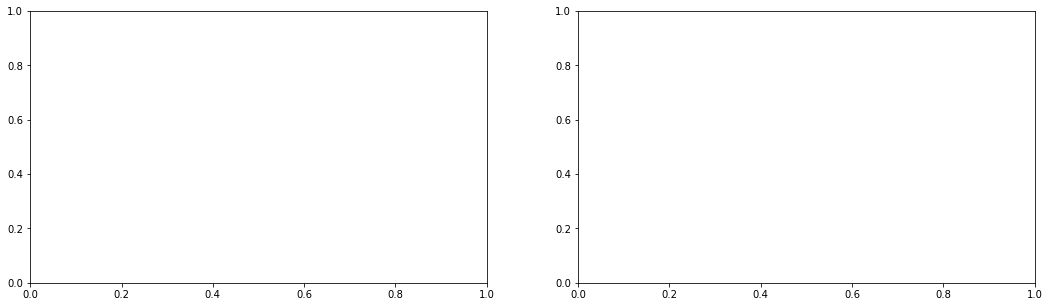

In [188]:
dict_clusters_km = plot_clustering(data=df,
                                   data_scale=X_scaled,
                                   embedding=X_pca,
                                   kwargs=params_cluster['KMeans'],
                                   model=KMeans,
                                   type_train='embedding')

In [ ]:
X_scaled = StandardScaler().fit_transform(df_short)

pca = PCA().fit(X_scaled)

plt.figure(figsize=(12, 5))
x = np.arange(1, len(pca.explained_variance_ratio_)+1)
plt.plot(x, np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--', color='b')
plt.axhline(y=0.9, color='r', linestyle='-')
plt.text(0.6, 0.85, '90% cut-off threshold', color = 'red', fontsize=12)
plt.grid(axis='x')

plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()